In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 21.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/diabetes-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [5]:
dataset = pd.read_csv('/content/diabetes.csv')

In [6]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
dataset.shape

(768, 9)

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

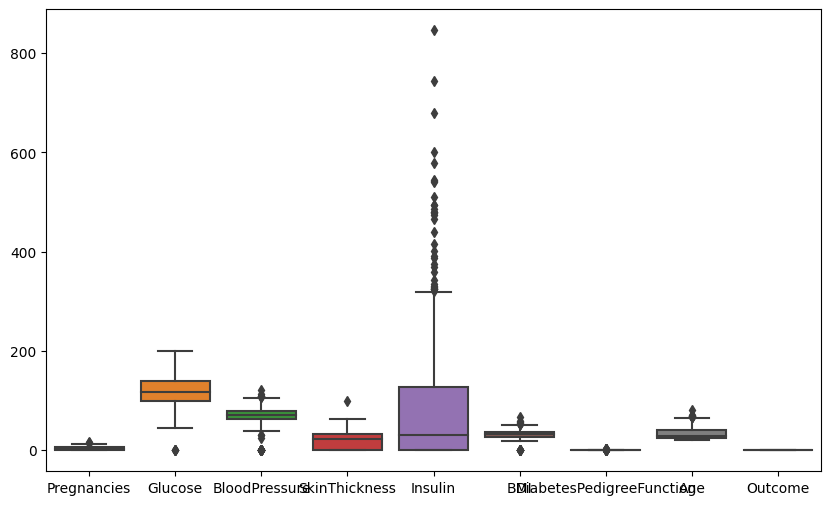

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset)

In [10]:
data = {}
for i in dataset.columns:
  min,q1,q2,q3,max = np.quantile(dataset[i],[0.0,0.25,0.50,0.75,1])
  iqr = q3-q1
  low_fence = q1 - 1.5*(iqr)
  high_fence = q1 + 1.5*(iqr)
  low_fence,high_fence
  data[str(i)]=[low_fence,high_fence]
data

{'Pregnancies': [-6.5, 8.5],
 'Glucose': [37.125, 160.875],
 'BloodPressure': [35.0, 89.0],
 'SkinThickness': [-48.0, 48.0],
 'Insulin': [-190.875, 190.875],
 'BMI': [13.35, 41.25],
 'DiabetesPedigreeFunction': [-0.32999999999999996, 0.8175],
 'Age': [-1.5, 49.5],
 'Outcome': [-1.5, 1.5]}

In [11]:
df2 = dataset[(dataset['Pregnancies'] < 8.5) & (dataset['Glucose'] < 160) & (dataset['BloodPressure'] < 89) & (dataset['Insulin'] < 190)]

In [12]:
df2.shape

(493, 9)

In [13]:
df2['Outcome'].value_counts()

0    381
1    112
Name: Outcome, dtype: int64

In [14]:
d_df = df2[df2['Outcome'] == 1]
n_df = df2[df2['Outcome'] == 0]

In [15]:
d_df.shape,n_df.shape

((112, 9), (381, 9))

In [16]:
d_df_x = d_df.iloc[:,:-1]
d_df_y = d_df['Outcome']
n_df_x = d_df.iloc[:,:-1]
n_df_y = d_df['Outcome']

In [17]:
smoting = SMOTE(sampling_strategy='all',k_neighbors=3)
X,Y = smoting.fit_resample(df2.iloc[:,:-1],df2['Outcome'])
X,Y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
 0              6      148             72             35        0  33.600000   
 1              1       85             66             29        0  26.600000   
 2              1       89             66             23       94  28.100000   
 3              0      137             40             35      168  43.100000   
 4              5      116             74              0        0  25.600000   
 ..           ...      ...            ...            ...      ...        ...   
 757            0      129             45             37      167  37.296076   
 758            2       81             42             35       92  40.085790   
 759            4      115             73              0        0  29.571884   
 760            4      138             75              6        0  27.070203   
 761            0       98             47             35       85  45.092367   
 
      DiabetesPedigreeFunction  Age  


In [18]:
final_df = pd.concat([X,Y],axis=1)
final_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              6      148             72             35        0  33.600000   
1              1       85             66             29        0  26.600000   
2              1       89             66             23       94  28.100000   
3              0      137             40             35      168  43.100000   
4              5      116             74              0        0  25.600000   
..           ...      ...            ...            ...      ...        ...   
757            0      129             45             37      167  37.296076   
758            2       81             42             35       92  40.085790   
759            4      115             73              0        0  29.571884   
760            4      138             75              6        0  27.070203   
761            0       98             47             35       85  45.092367   

     DiabetesPedigreeFunction  Age  Outcome  
0                    0.627000   50        1  
1                    0.351000   31        0  
2                    0.167000   21        0  
3                    2.288000   33        1  
4                    0.201000   30        0  
..                        ...  ...      ...  
757                  1.502694   30        1  
758                  0.341887   26        1  
759                  0.366360   45        1  
760                  0.261213   63        1  
761                  0.636538   25        1  

[762 rows x 9 columns]

<Axes: >

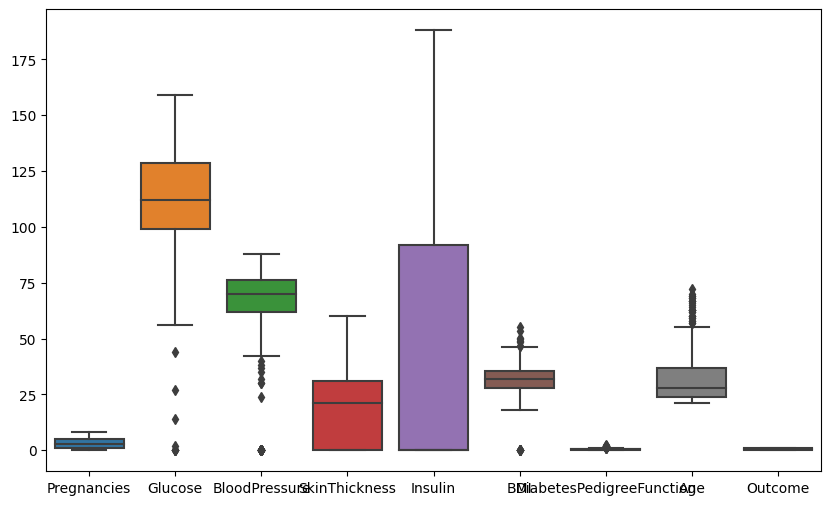

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=final_df)

In [20]:
final_df['Outcome'].value_counts()

1    381
0    381
Name: Outcome, dtype: int64

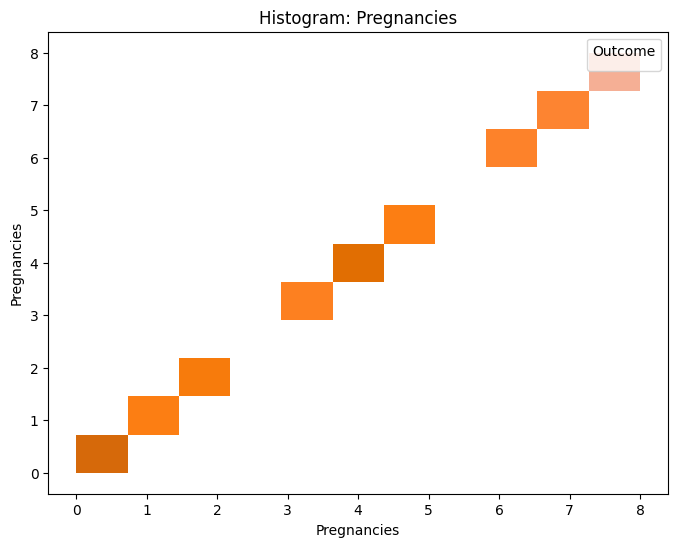

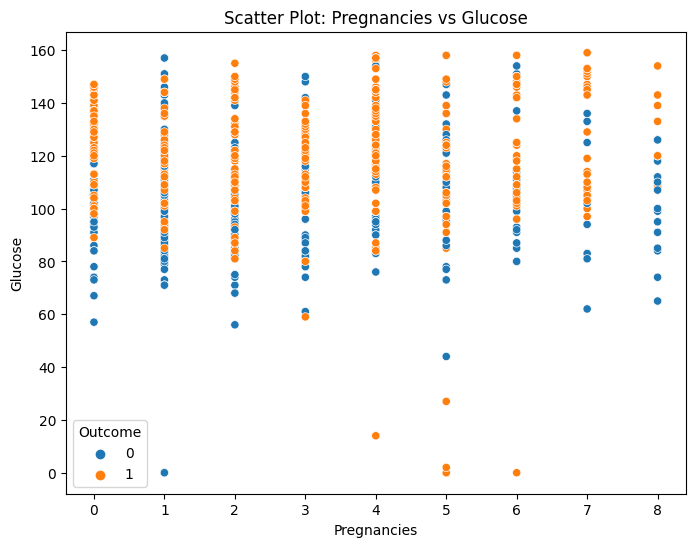

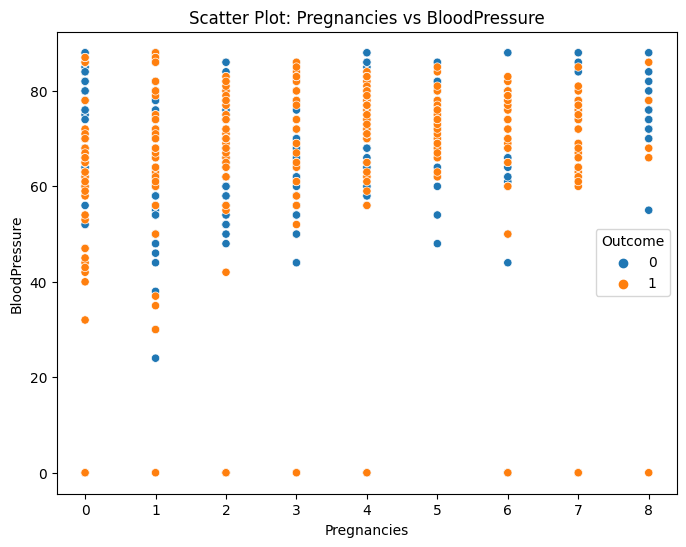

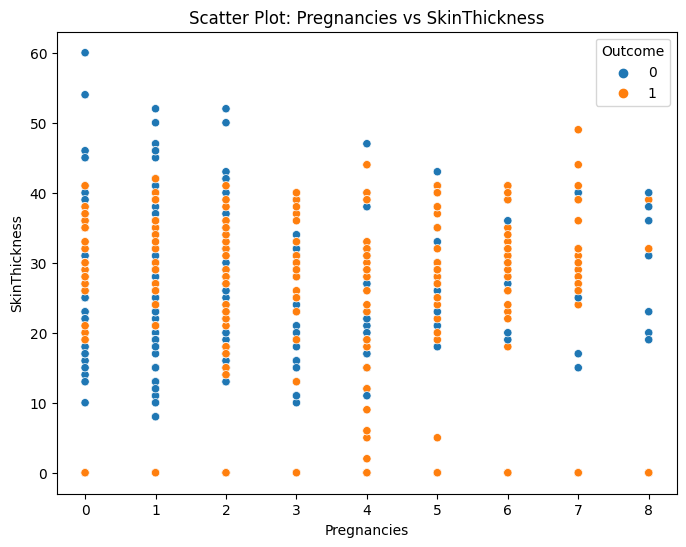

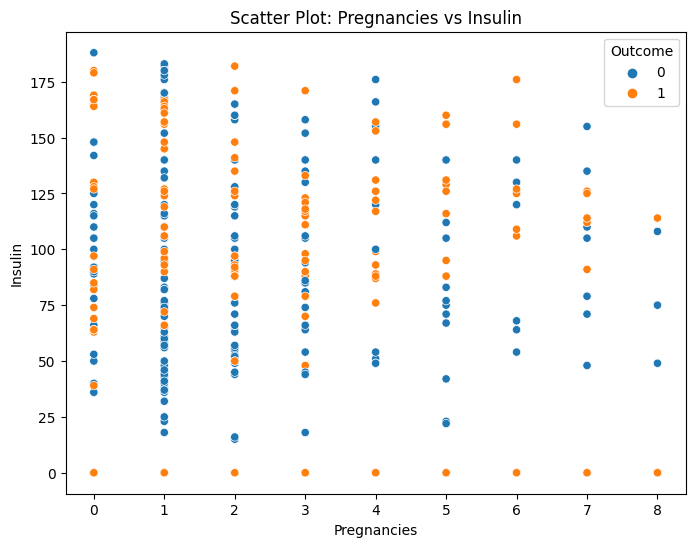

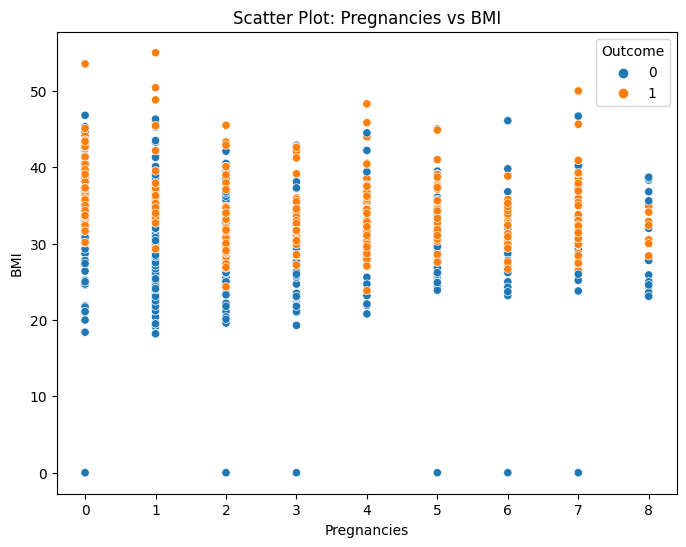

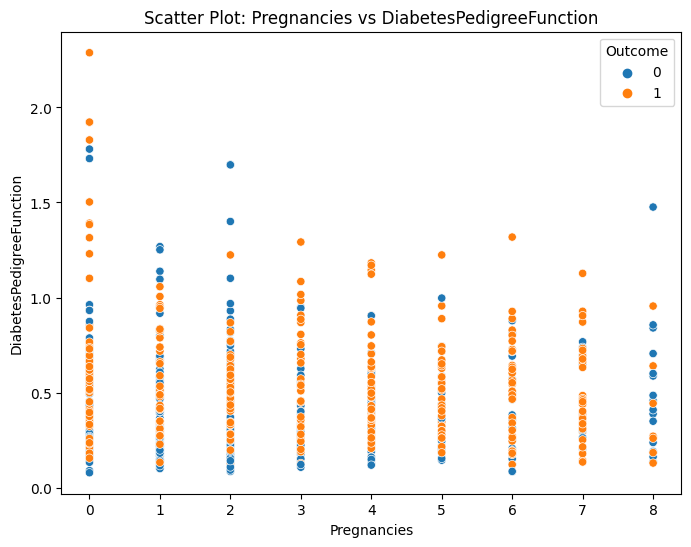

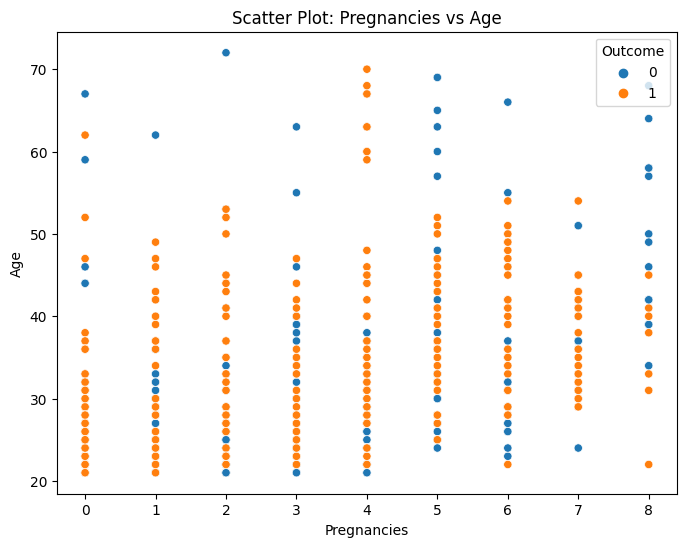

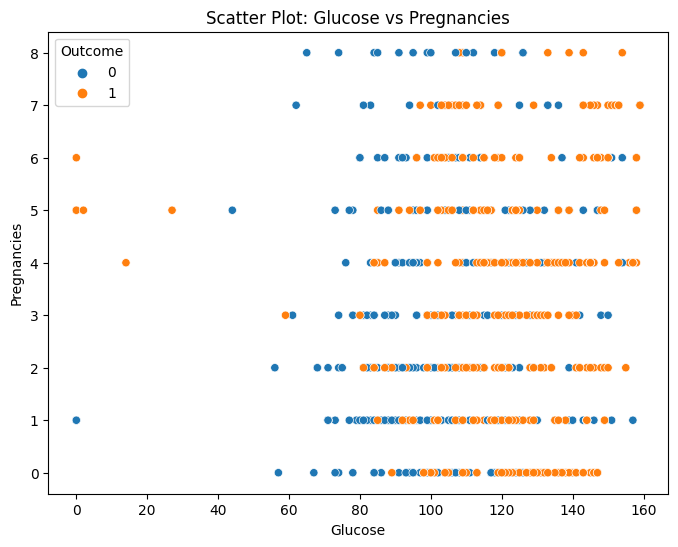

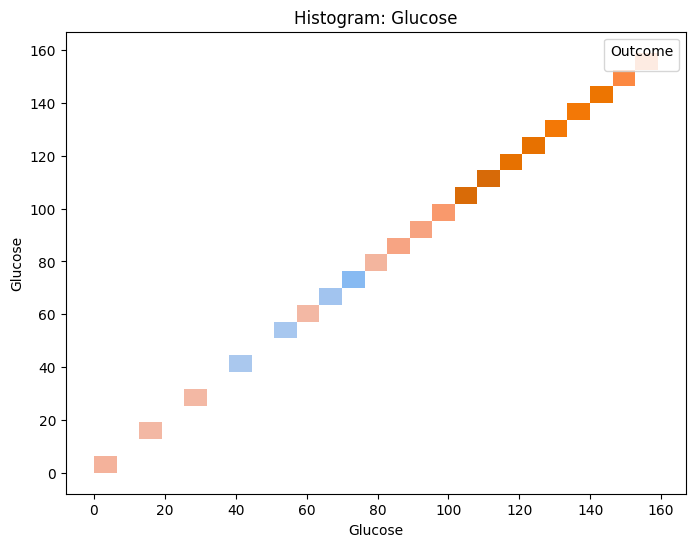

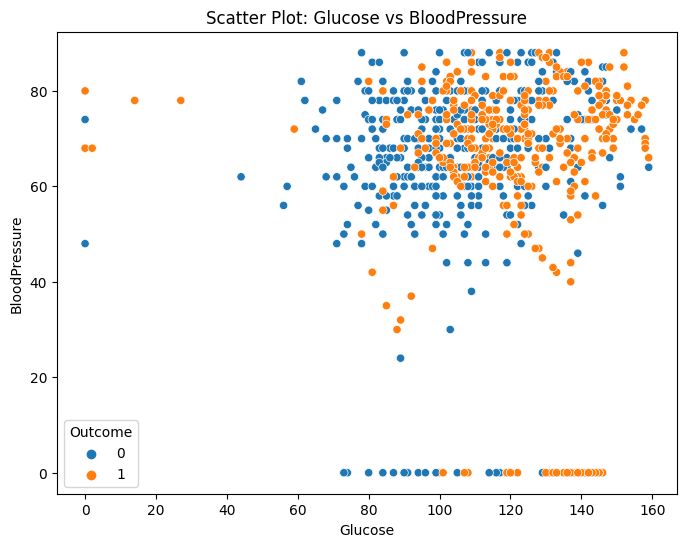

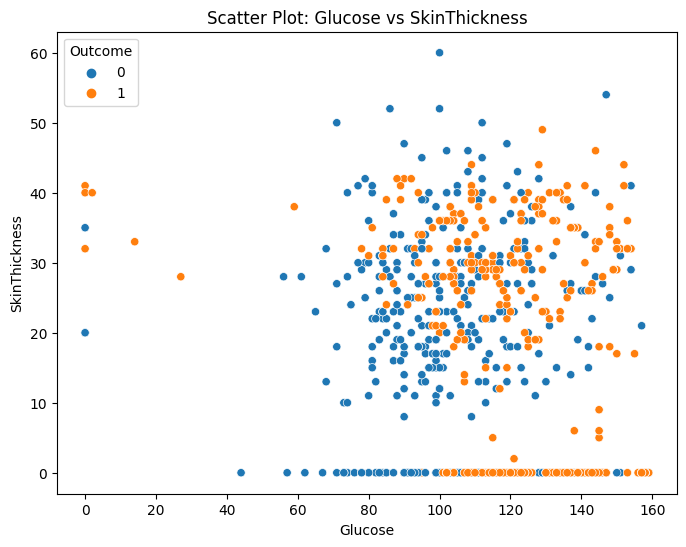

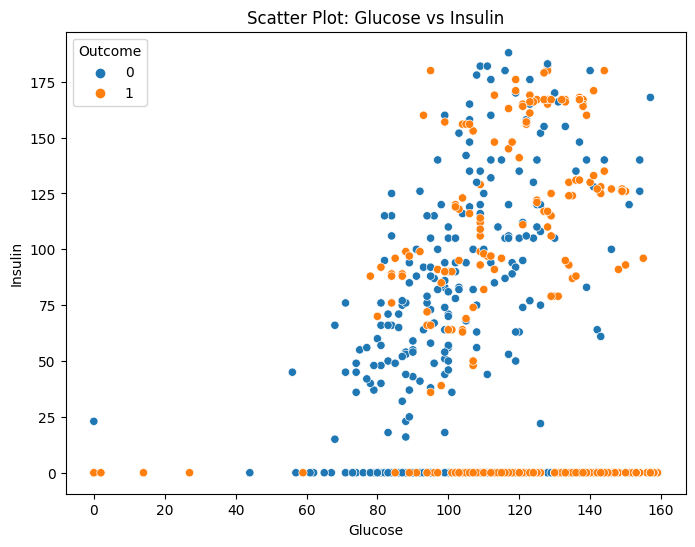

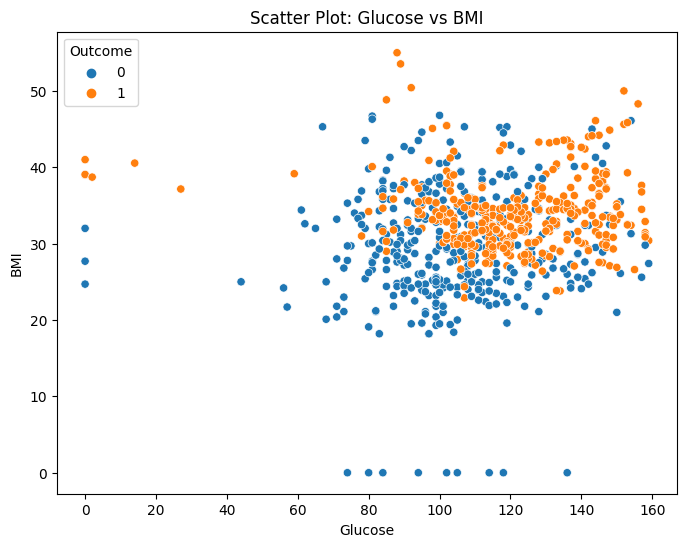

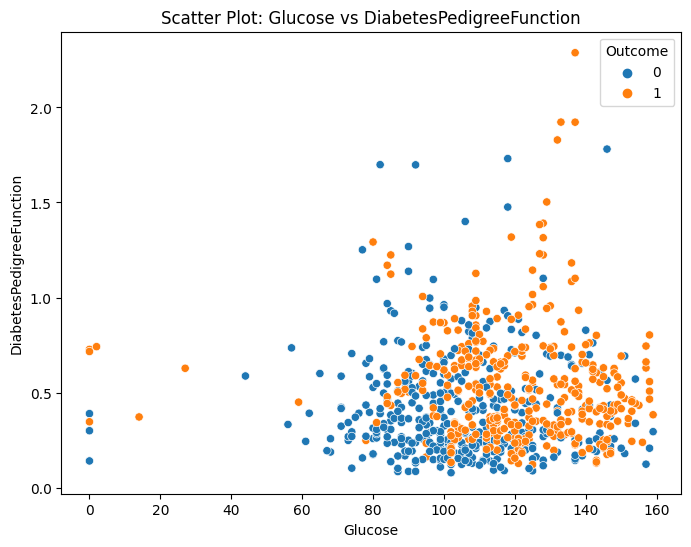

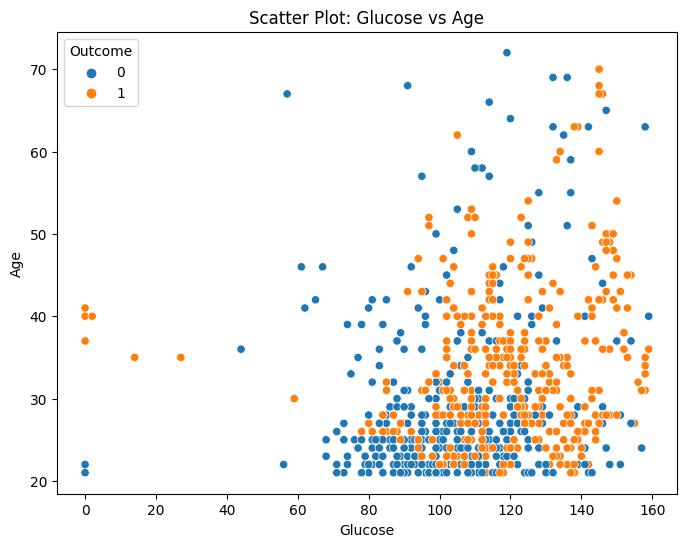

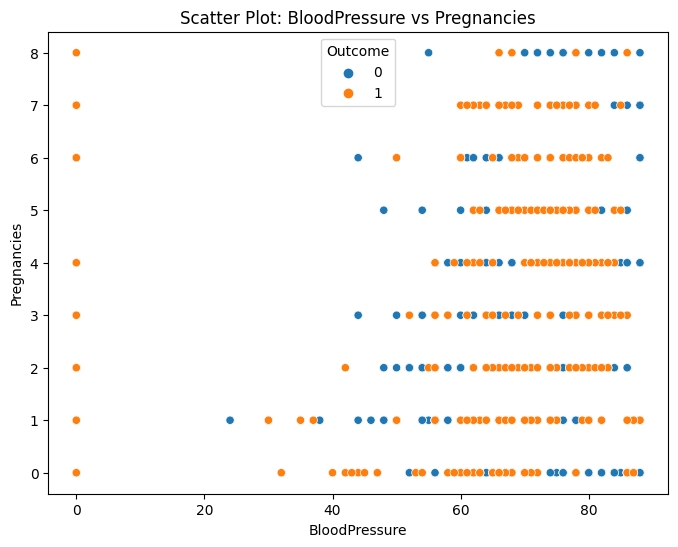

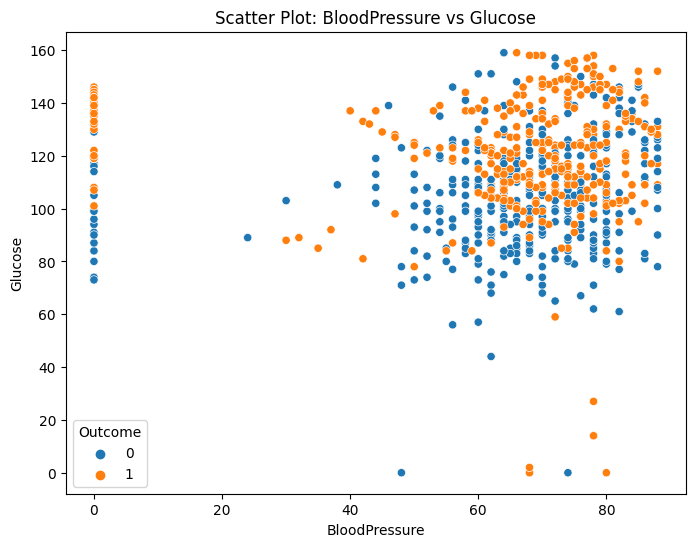

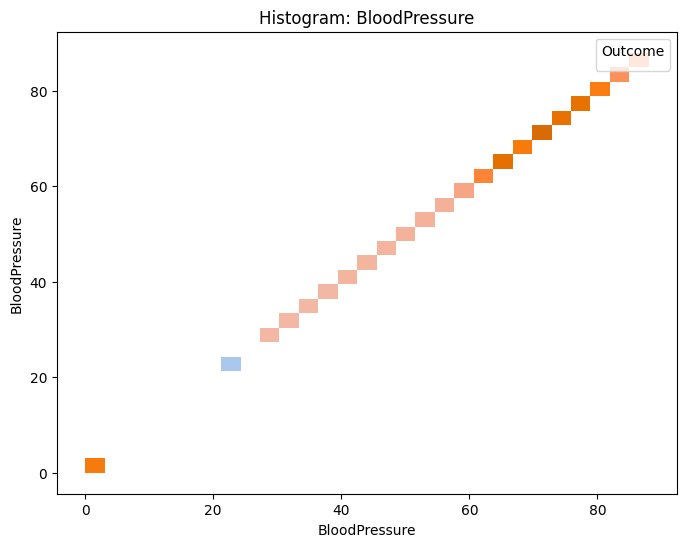

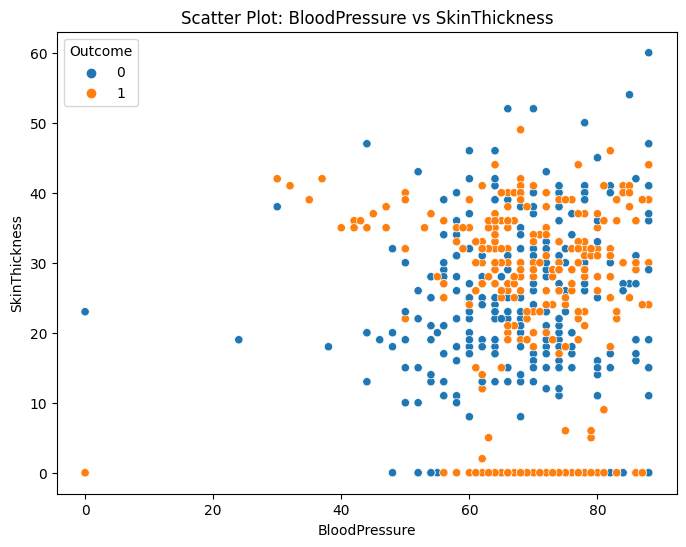

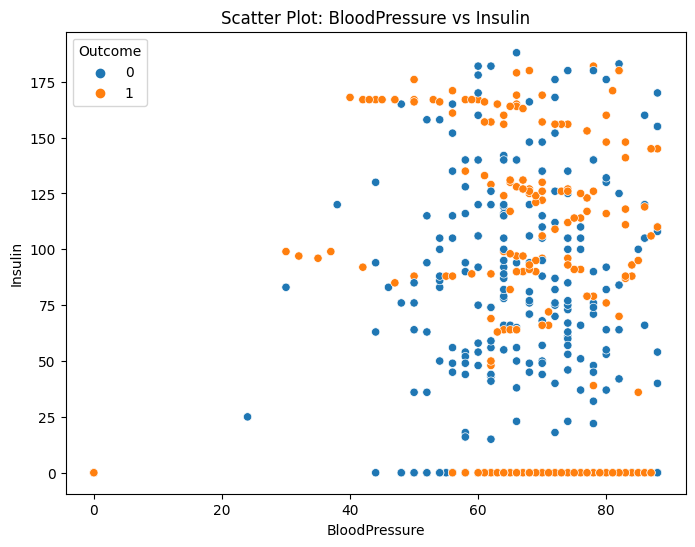

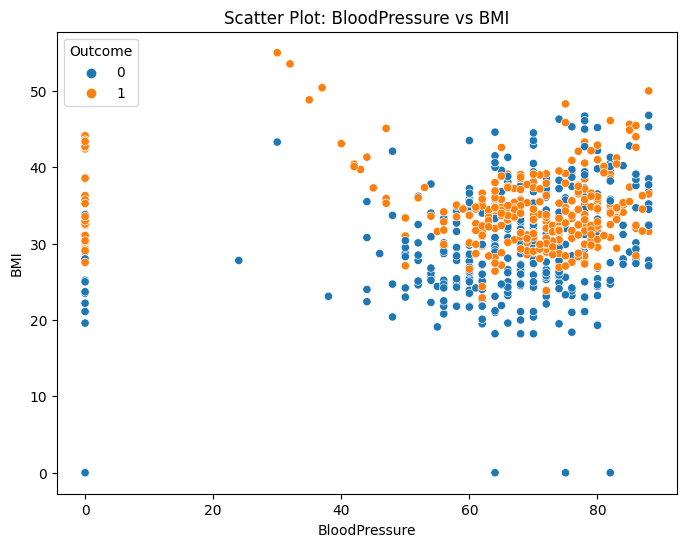

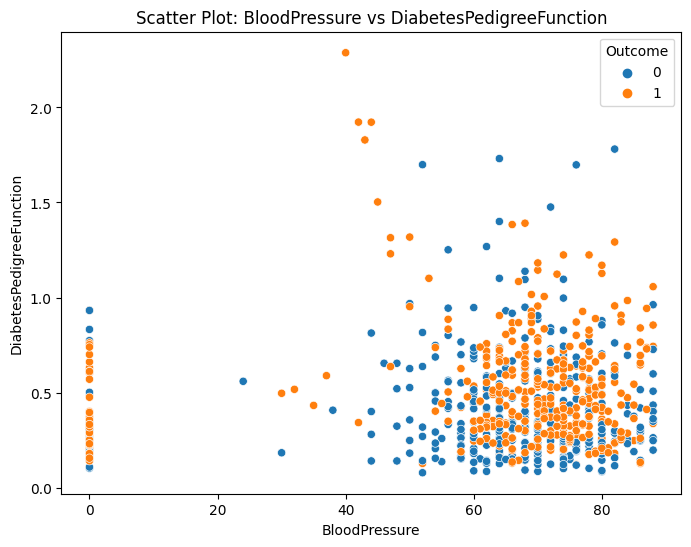

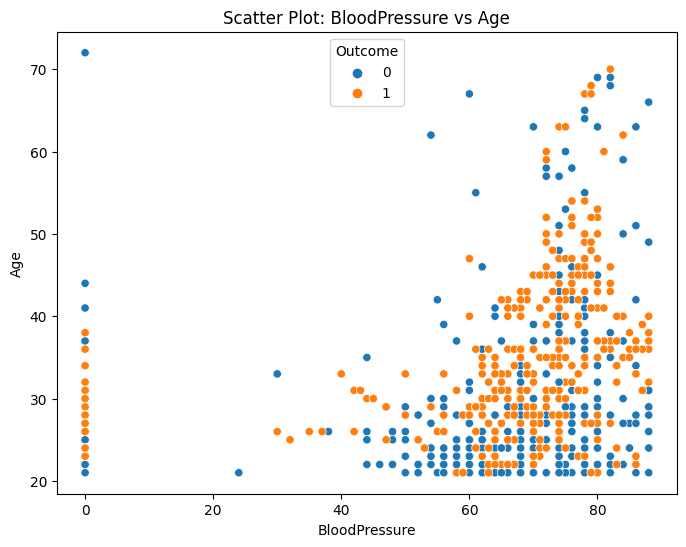

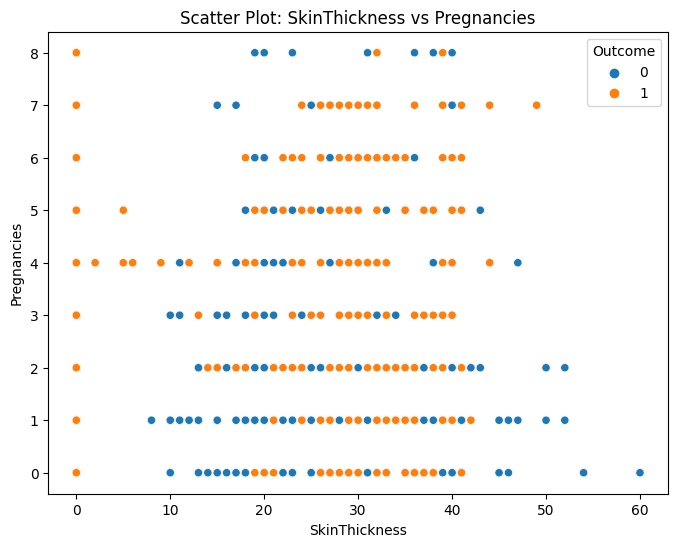

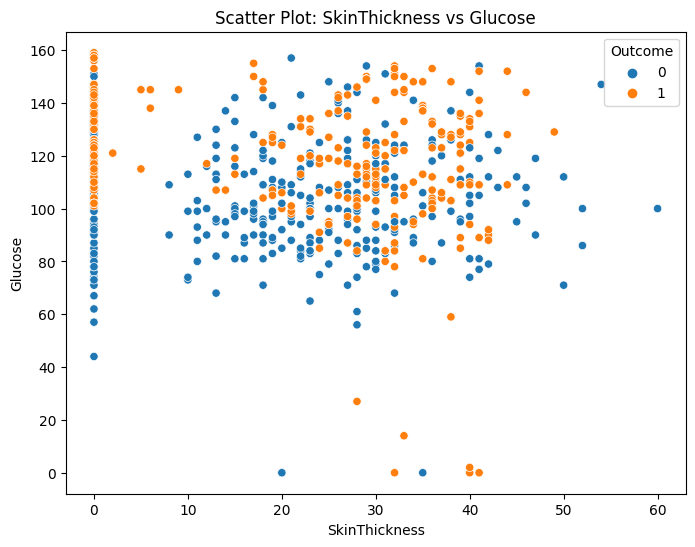

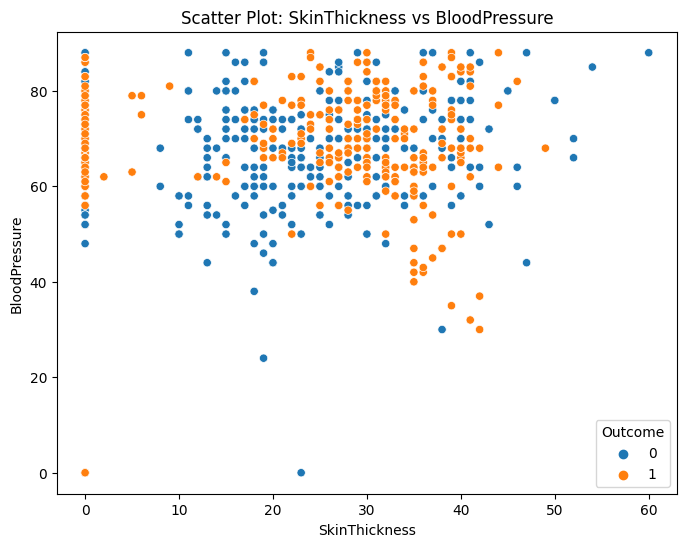

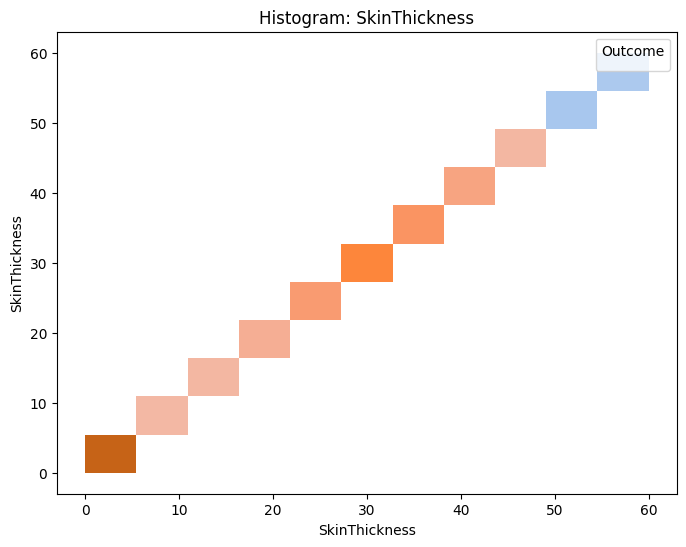

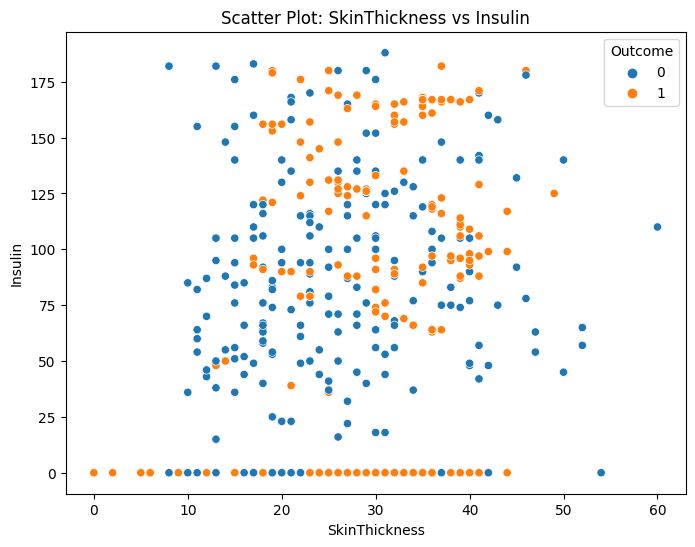

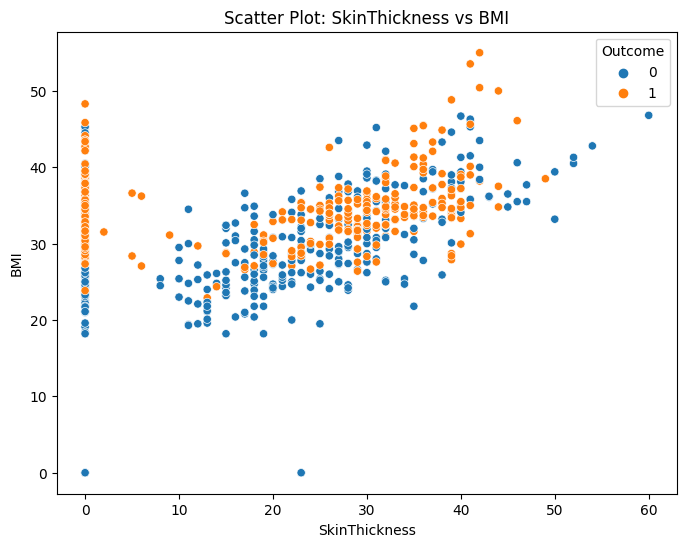

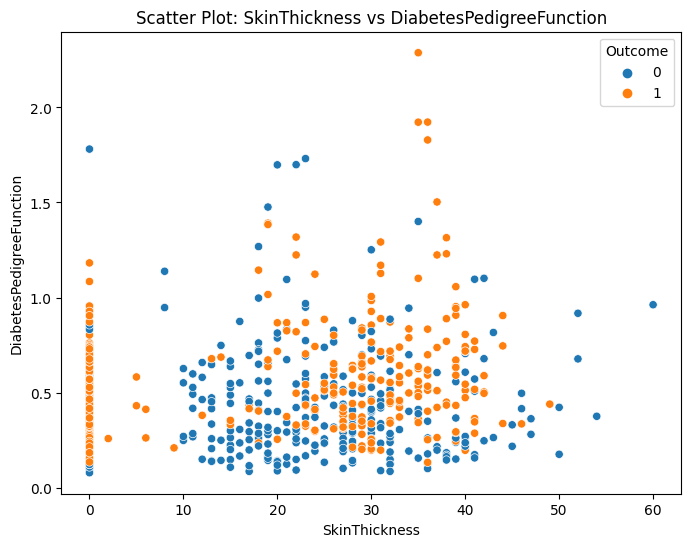

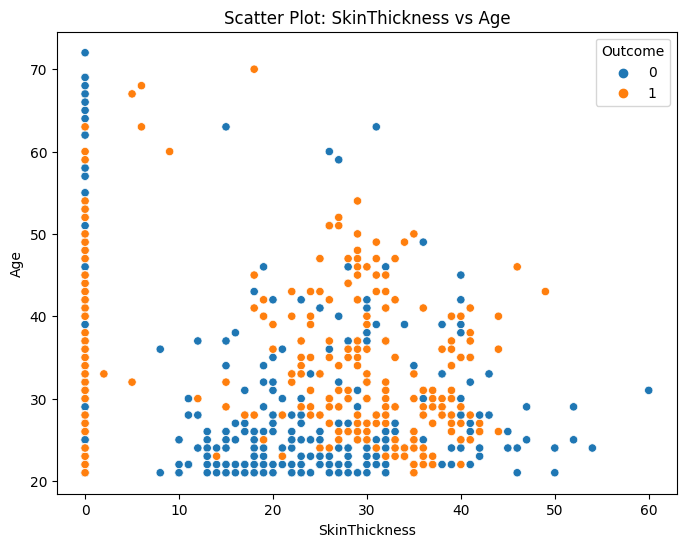

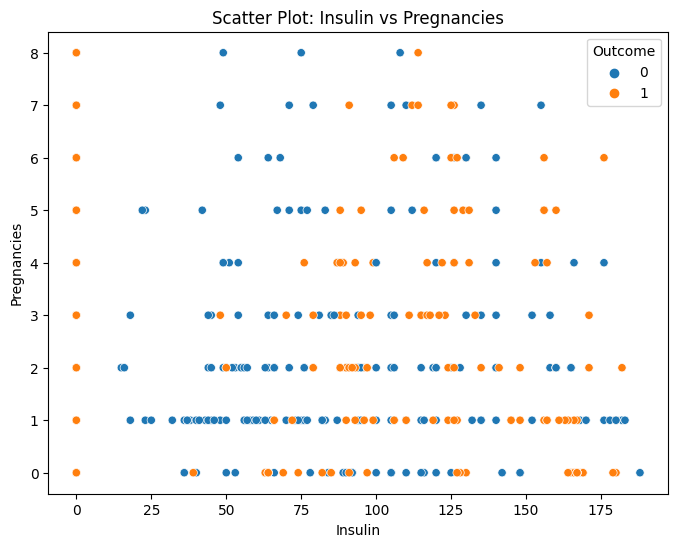

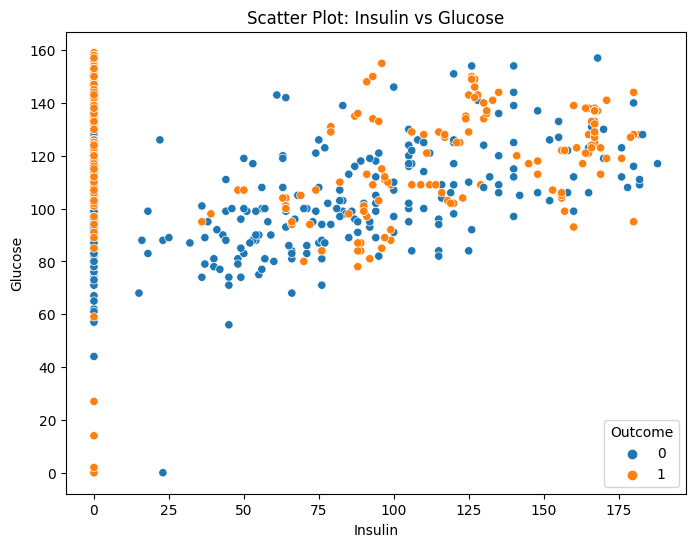

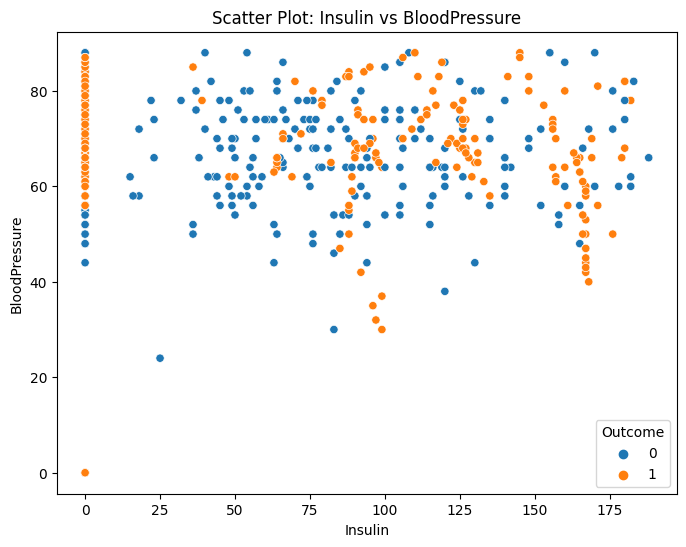

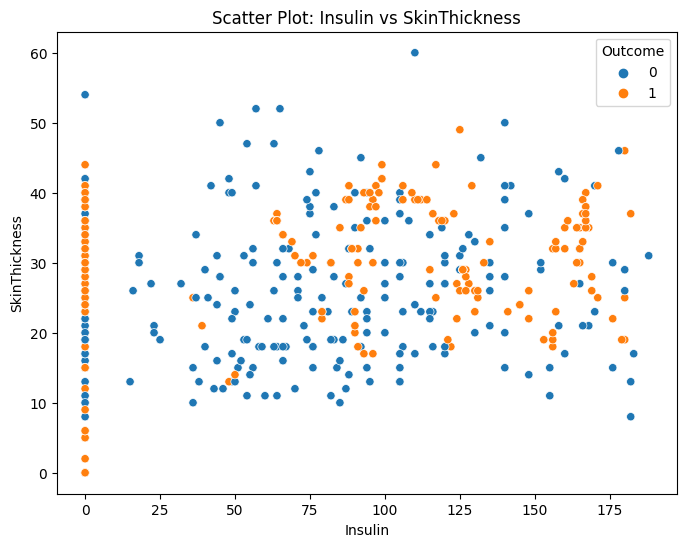

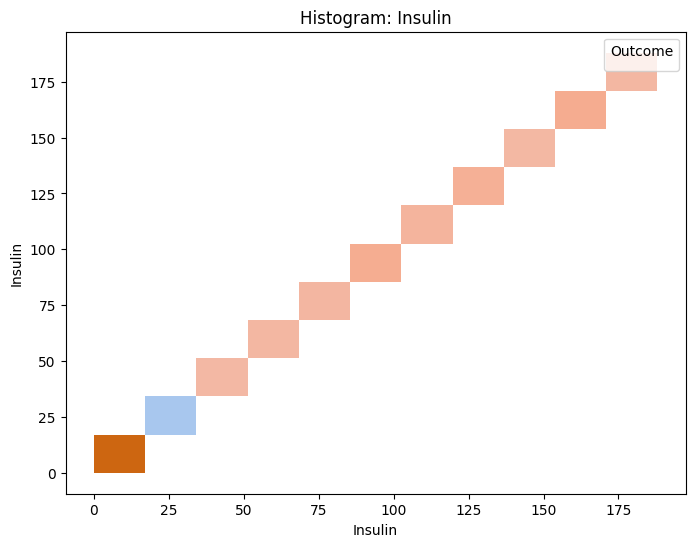

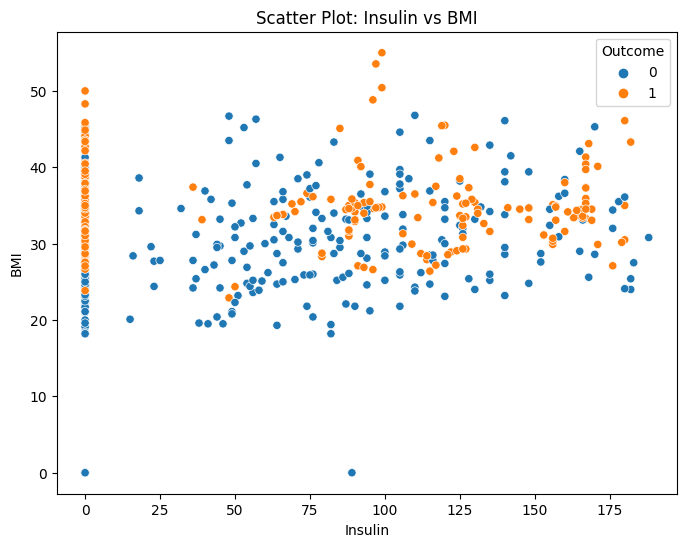

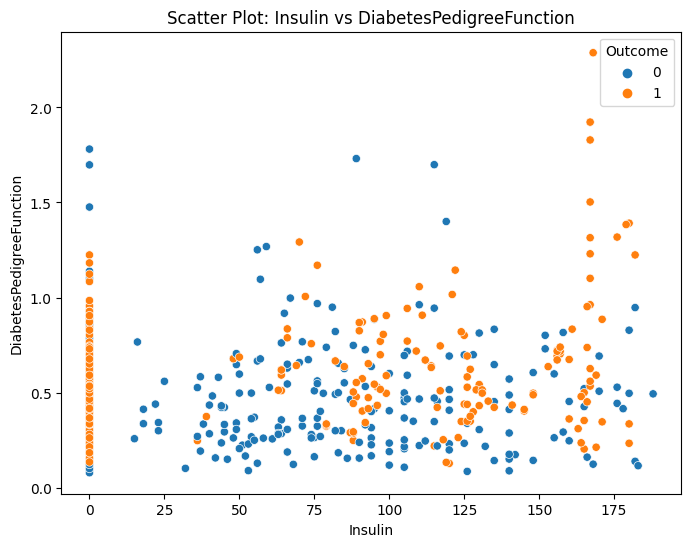

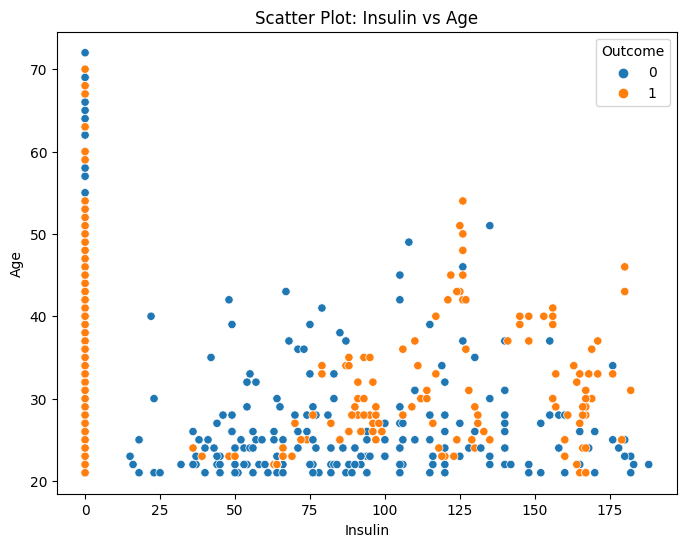

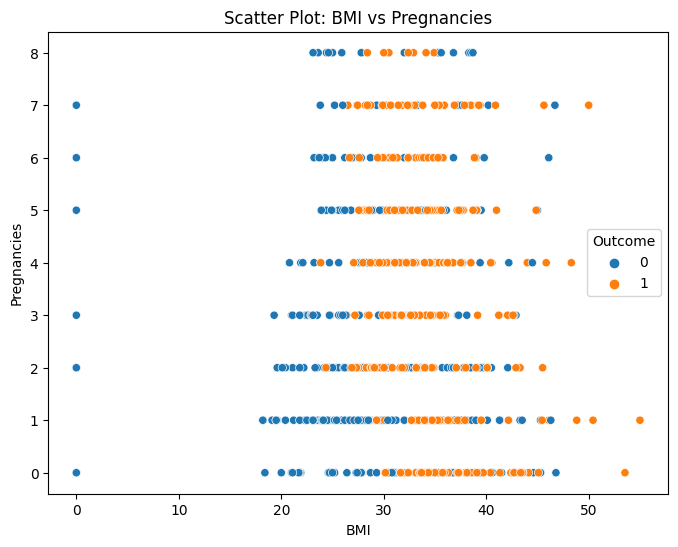

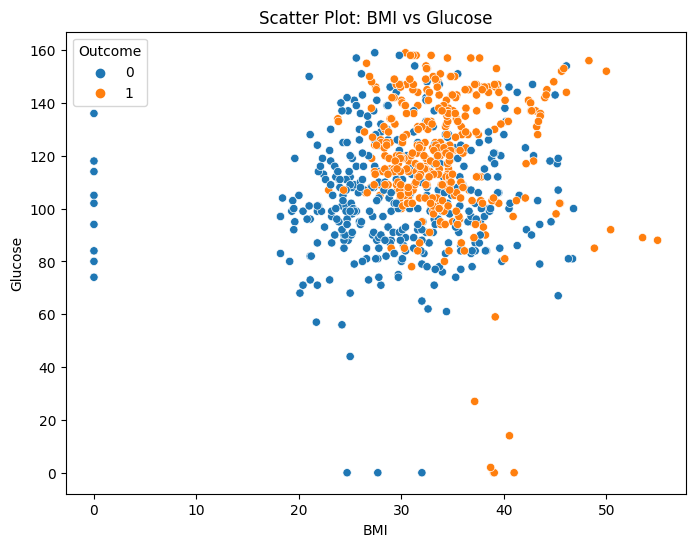

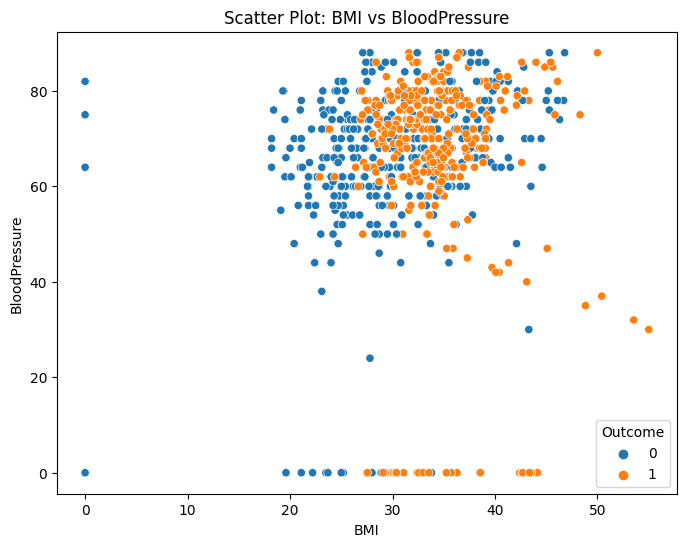

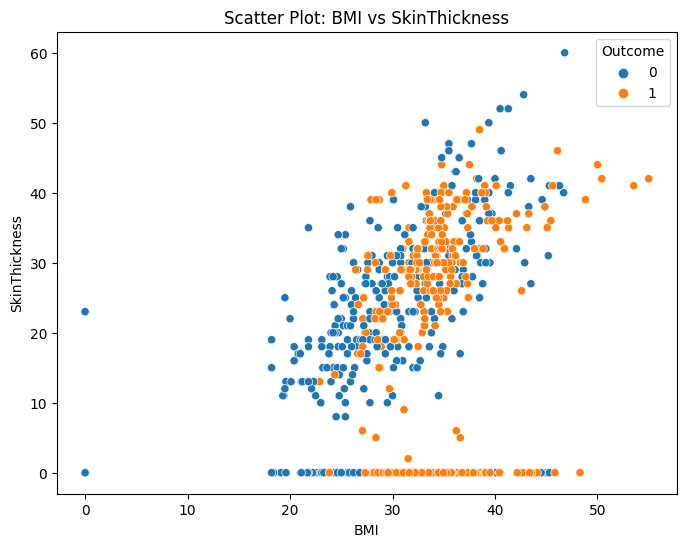

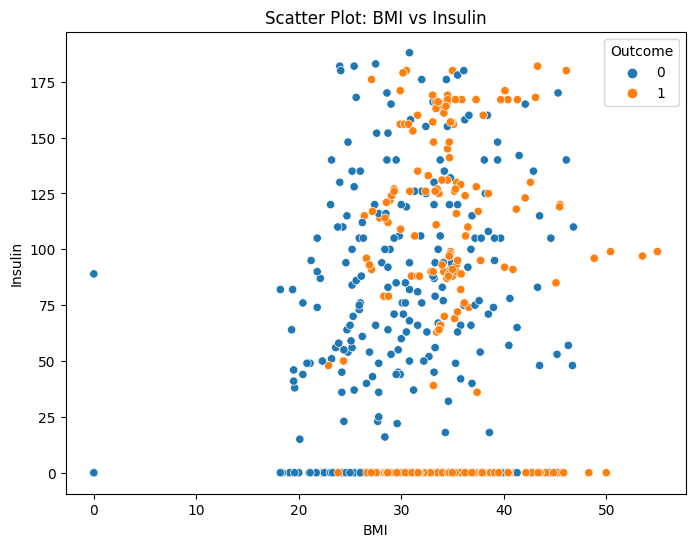

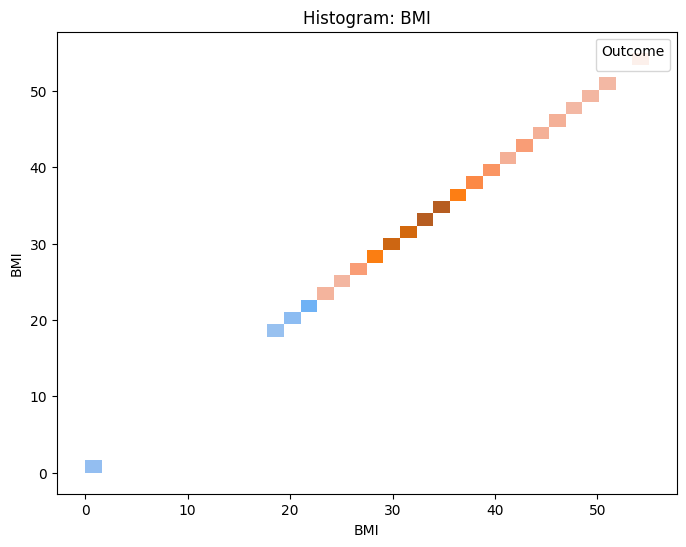

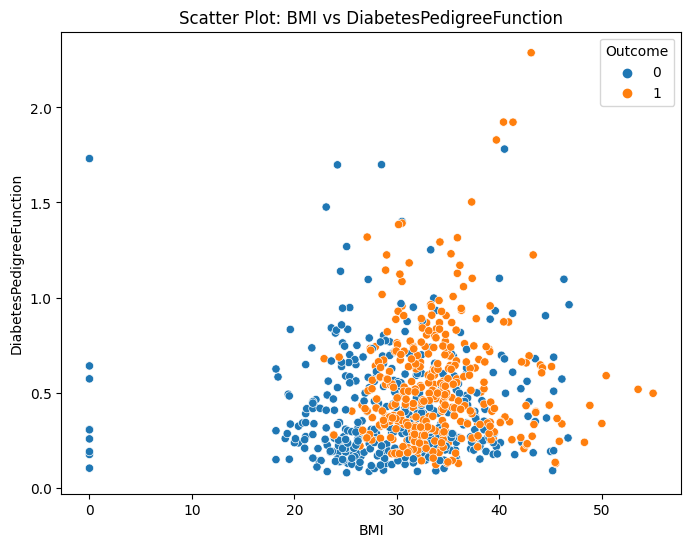

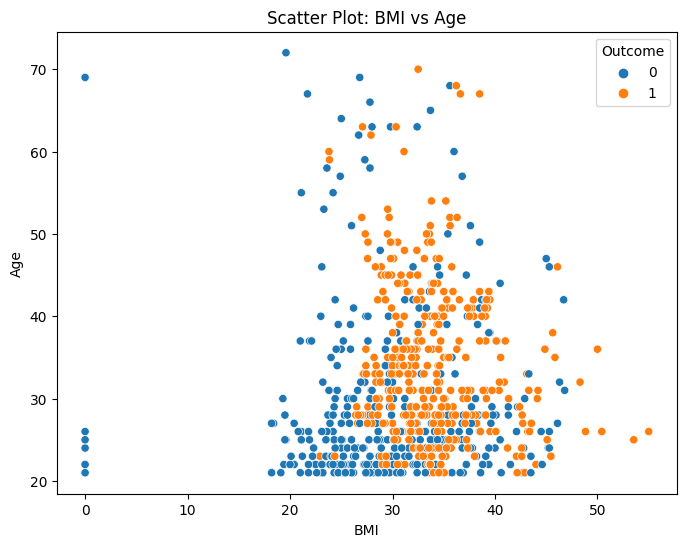

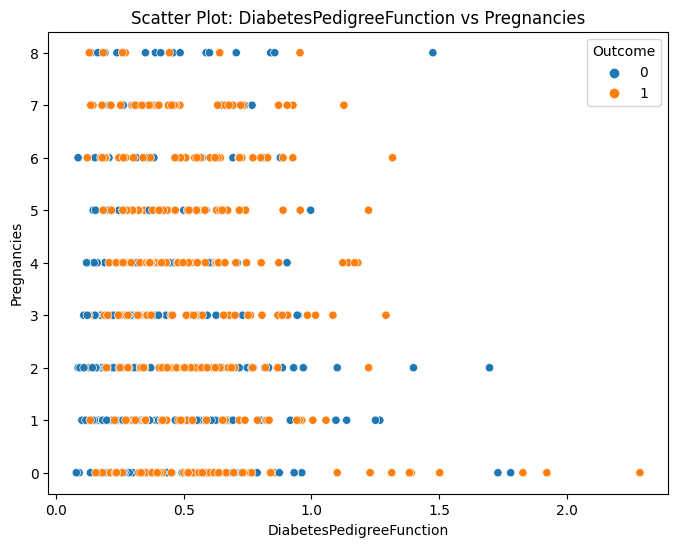

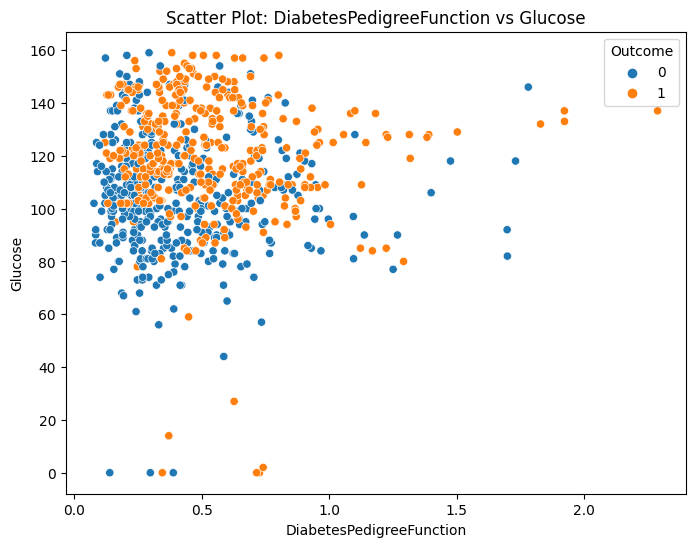

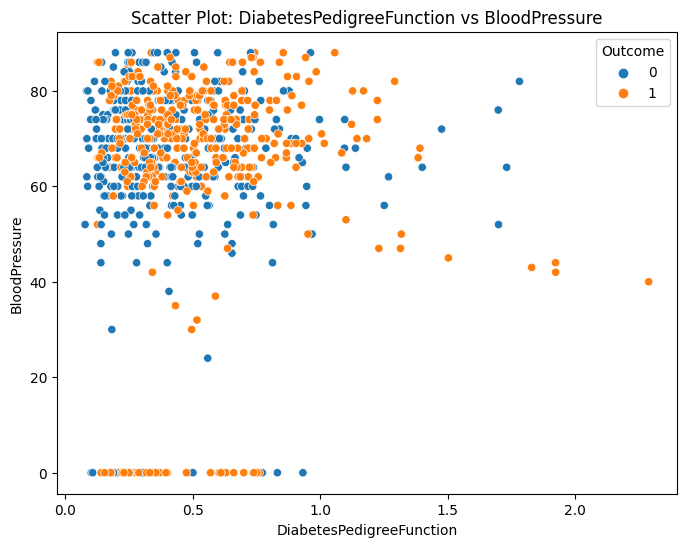

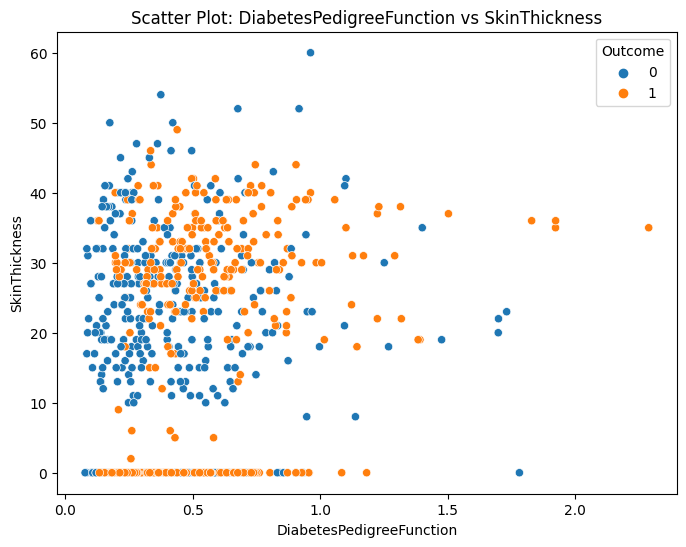

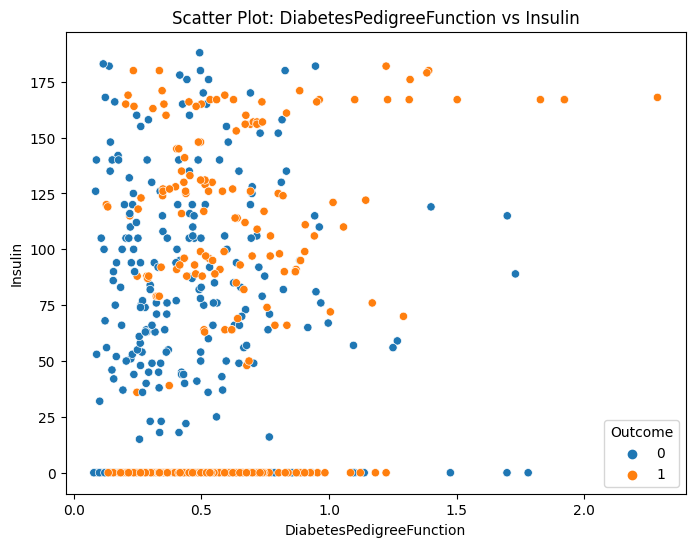

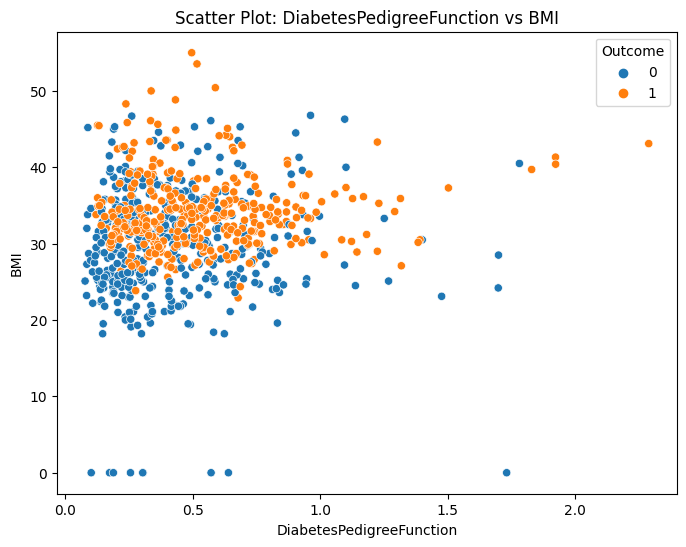

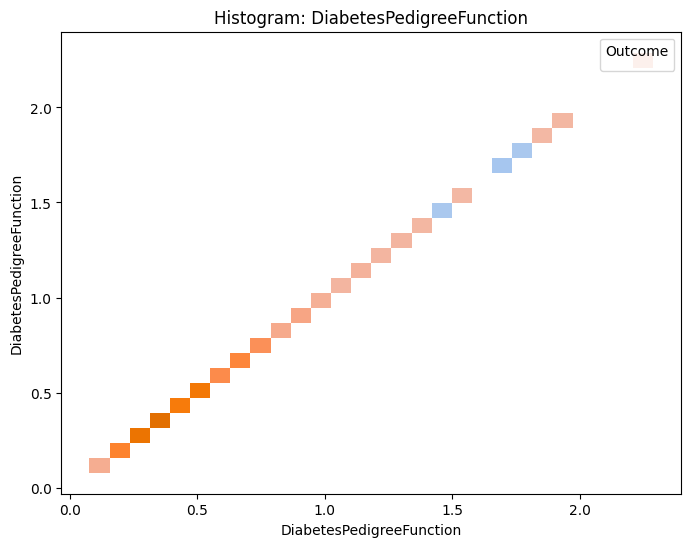

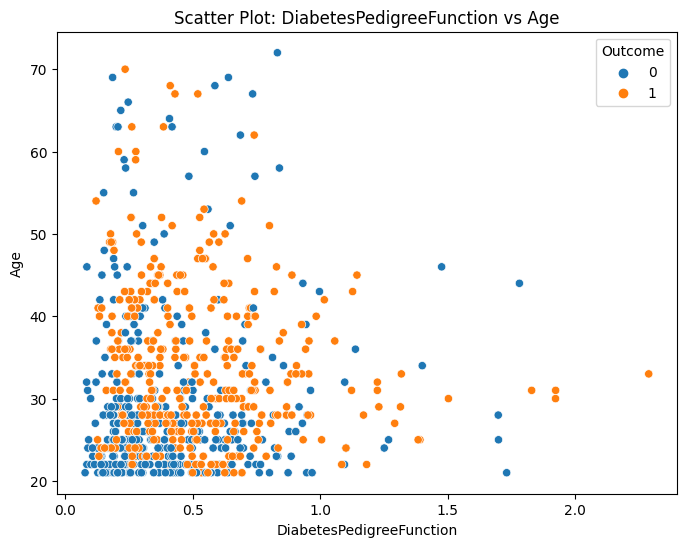

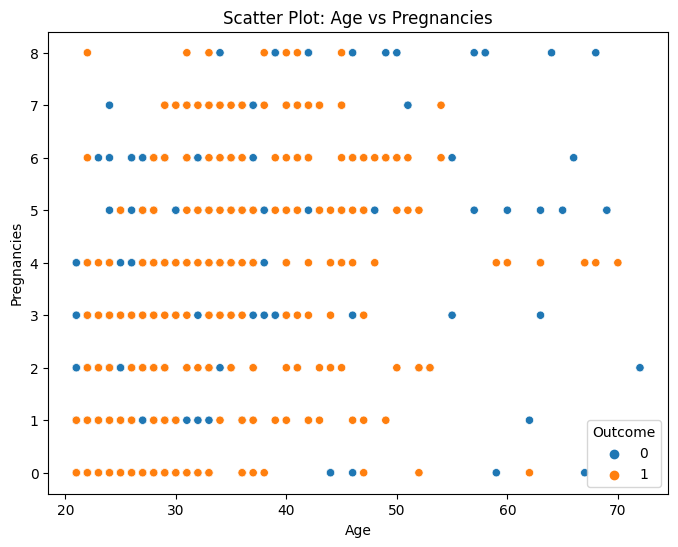

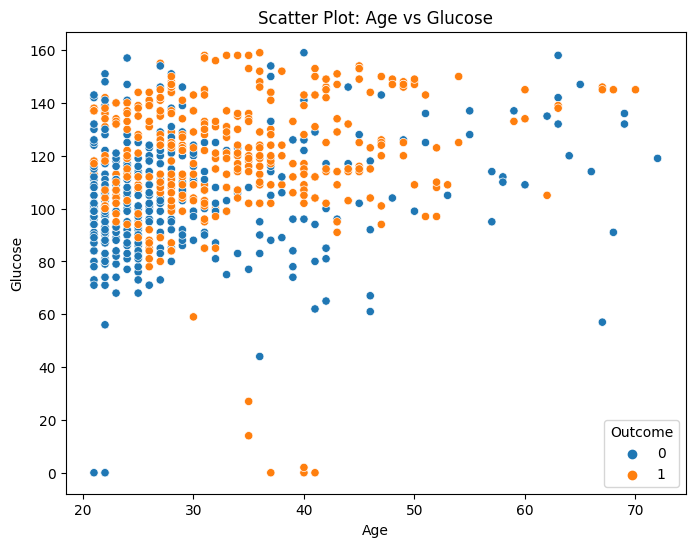

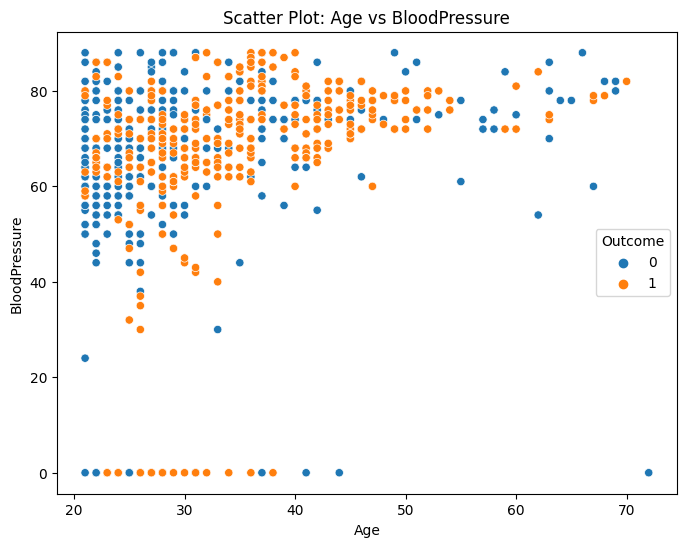

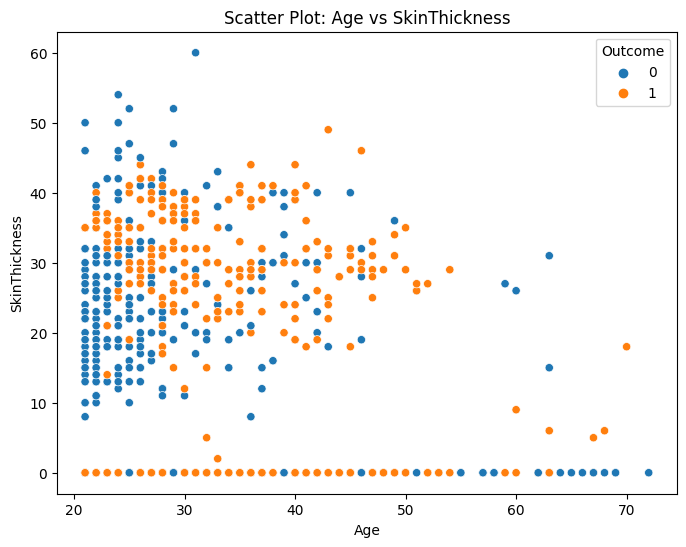

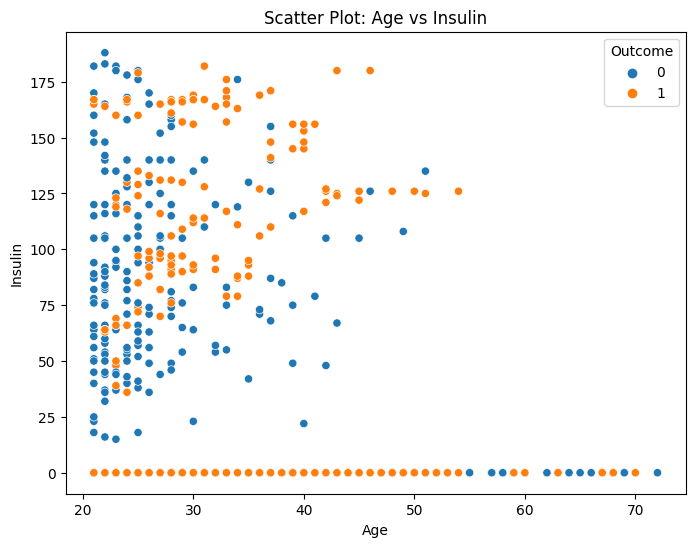

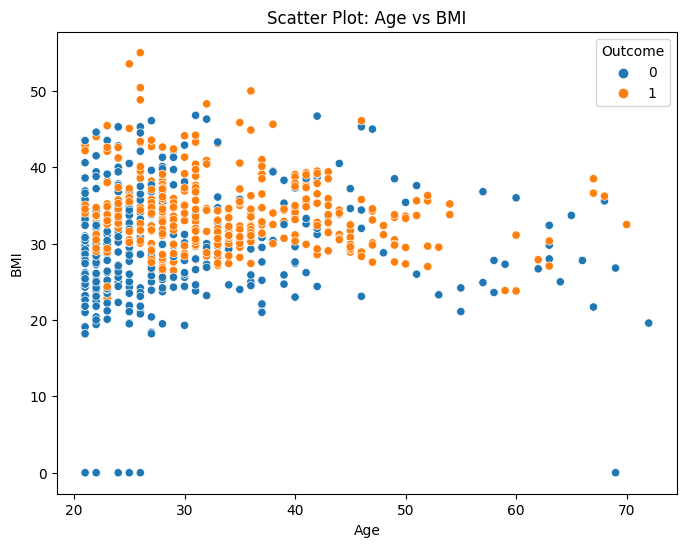

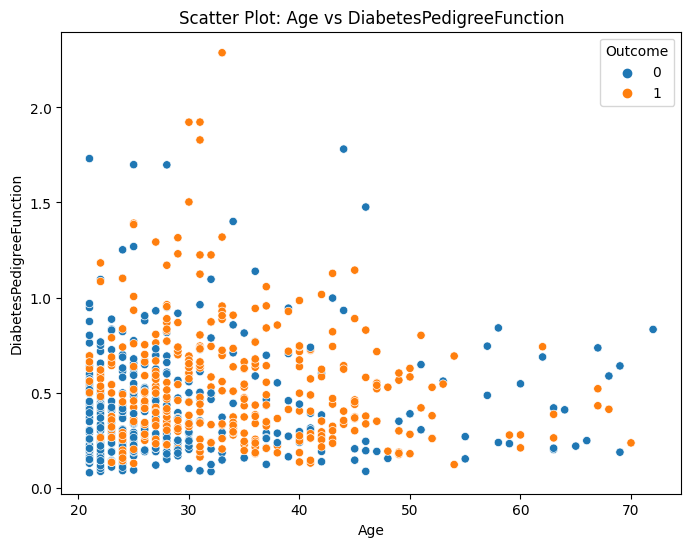

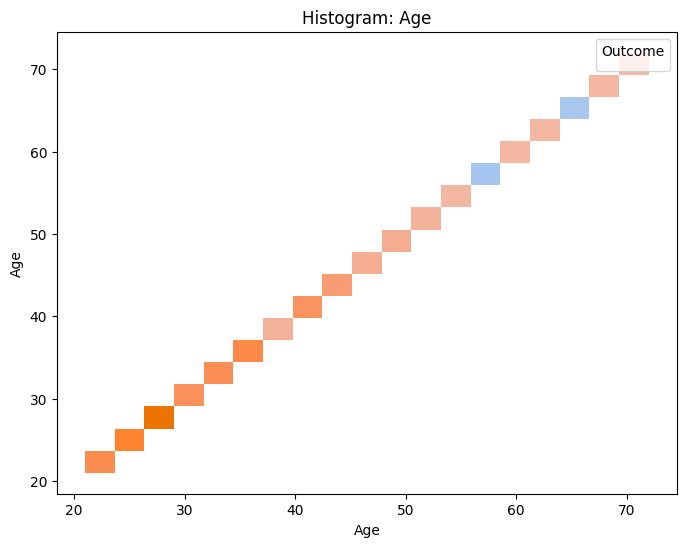

In [21]:
# Exclude the 'Outcome' column from the loop
columns_to_plot = [col for col in final_df.columns if col != 'Outcome']

# Create a grid of scatter plots and histograms
for i in columns_to_plot:
    for j in columns_to_plot:
        if i != j:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=i, y=j, hue='Outcome', data=final_df)
            plt.xlabel(i)
            plt.ylabel(j)
            plt.title(f'Scatter Plot: {i} vs {j}')
            plt.legend(title='Outcome')
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=final_df, x=i, y=j, hue='Outcome', element='step')
            plt.xlabel(i)
            plt.ylabel(j)
            plt.title(f'Histogram: {i}')
            plt.legend(title='Outcome')
            plt.show()


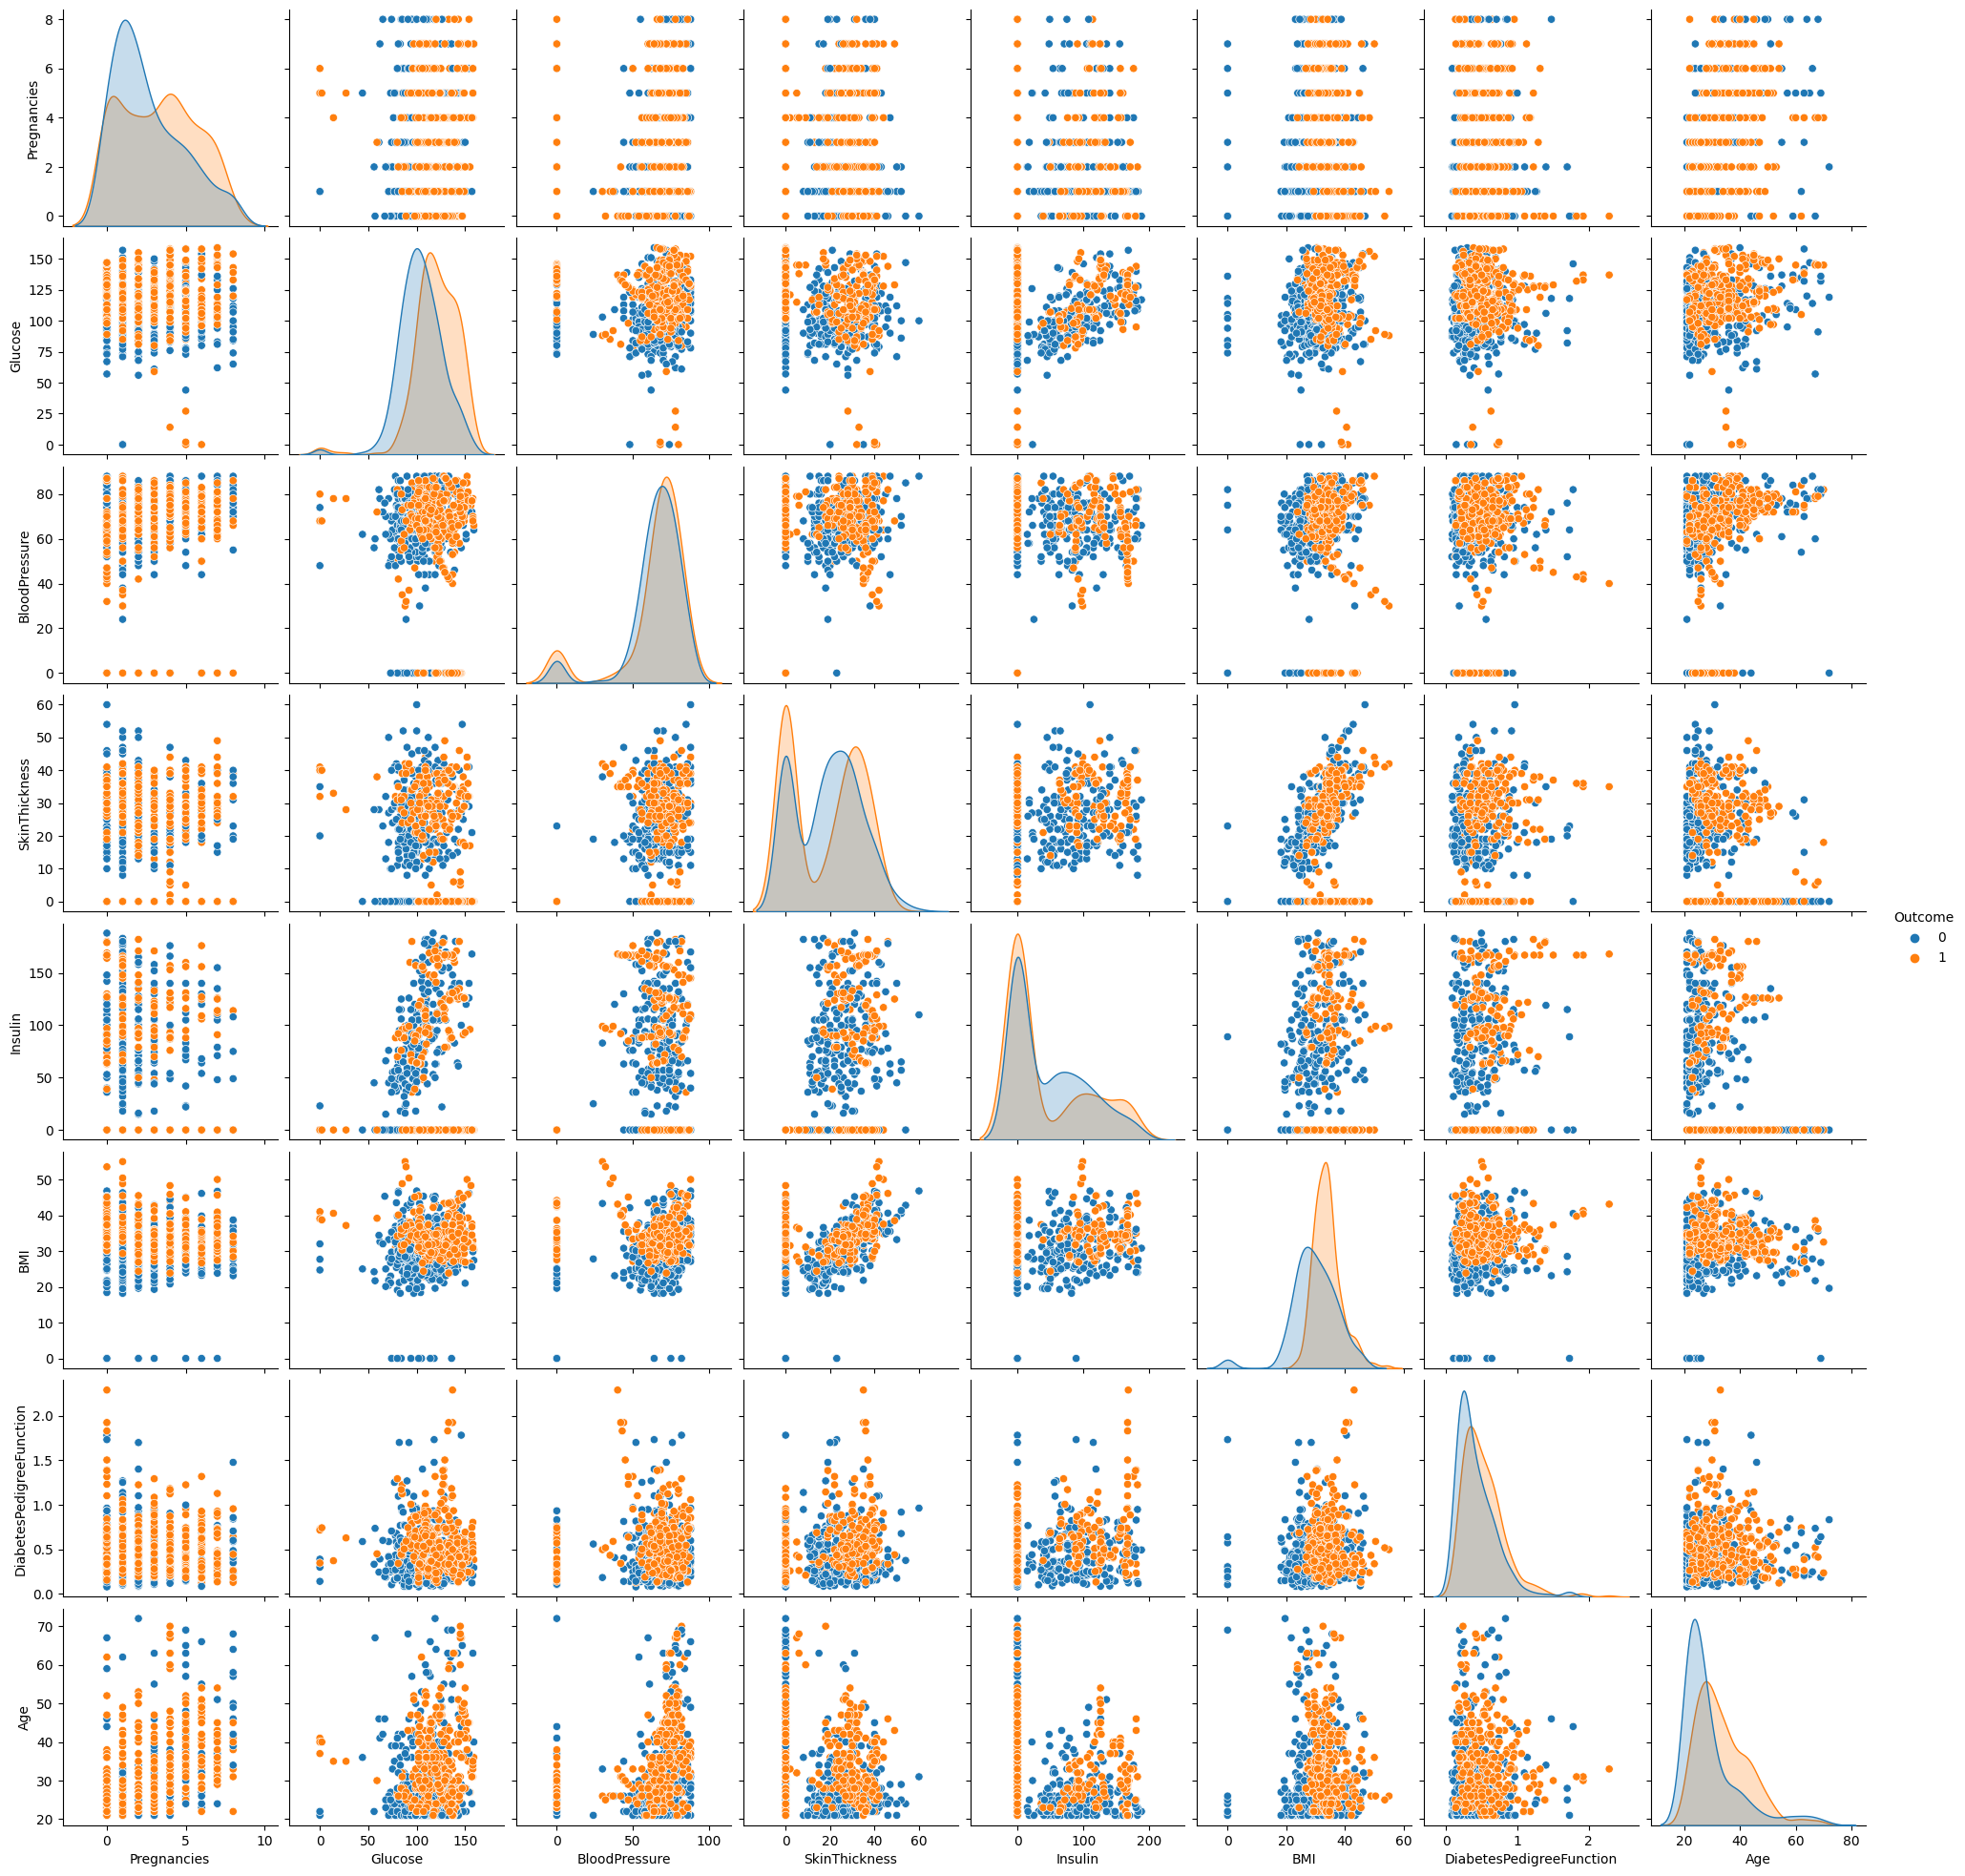

In [22]:
sns.pairplot(data=final_df,hue='Outcome')

In [23]:
final_df.to_csv('dataset.csv')

In [24]:
# Classification Model Import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Regarding data
from sklearn.model_selection import cross_val_score, train_test_split

# Accuracy score
from sklearn.metrics import accuracy_score

# Standardized Data
from sklearn.preprocessing import StandardScaler

# Download Model
import pickle

models = [
    LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier()
]

In [25]:
feature_names = X.columns.tolist()

standardization = StandardScaler()
standard_data = standardization.fit_transform(X)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(standard_data, Y, test_size=0.2, random_state=42)

result = {}
for model in models:
    score = cross_val_score(model, standard_data, Y, cv=5)
    result[model] = np.mean(score) * 100
    print('The model is', model, score * 100)

The model is LogisticRegression() [70.58823529 71.89542484 75.65789474 75.65789474 71.05263158]
The model is SVC() [76.47058824 83.00653595 82.89473684 80.26315789 79.60526316]
The model is KNeighborsClassifier() [82.35294118 79.73856209 82.89473684 79.60526316 80.26315789]
The model is RandomForestClassifier() [80.39215686 85.62091503 89.47368421 90.13157895 88.15789474]


In [26]:
result

{LogisticRegression(): 72.9704162366701,
 SVC(): 80.44805641554869,
 KNeighborsClassifier(): 80.97093223254215,
 RandomForestClassifier(): 86.75524595803233}

In [31]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train,y_train)

param_dist = {
    'n_estimators': [100, 300, 500],  # Fewer values to speed up the search
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],  # Smaller range
    'min_samples_split': [2, 5],  # Fewer values
    'min_samples_leaf': [1, 2],  # Fewer values
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_dist, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train,y_train)

# Get the best hyperparameters and the corresponding best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# You can also access the best estimator for further use
print("Best Estimator:", best_estimator)

# Optionally, you can assess the performance of the best estimator
best_score = grid_search.best_score_
print("Best Accuracy Score:", best_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       n_estimators=500, random_state=42)
Best Accuracy Score: 0.8324888226527571


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with default hyperparameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on your training data
rf_classifier.fit(x_train, y_train)

# Make predictions on your test data
predictions = rf_classifier.predict(x_test)


In [33]:
y_train_prediction = best_estimator.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_prediction)
print('Train Accuracy:', train_accuracy * 100)

y_test_prediction = best_estimator.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_prediction)
print('Test Accuracy:', test_accuracy * 100)

scaler_filename = 'standard_scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(standard_data, scaler_file)

scaler_filename = 'model.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(model, scaler_file)

list1 = [1,	89,	66,	23	,94	,28.1,	0.167	,21]
list1 = np.asarray(list1)
list1 = list1.reshape(1, -1)
list1 = standardization.transform(list1)
prediction = best_estimator.predict(list1)

if prediction == 1:
    print('Patient is Diabetic')
else:
    print('Patient is Non Diabetic')



Train Accuracy: 100.0
Test Accuracy: 92.81045751633987
Patient is Non Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
min2,q12,q22,q32,max2 = np.quantile(df['BloodPressure'],[0.0,0.25,0.50,0.75,1])
iqr2 = q32-q12
low_fence2 = q12 - 1.5*(iqr2)
high_fence2 = q12 + 1.5*(iqr2)
low_fence2,high_fence2

In [ ]:
dataset['Outcome'].value_counts()

Dataset is Imbalance the ratio of dataset is almost 2:1

In [ ]:
d_dataset = dataset[dataset['Outcome']==1]
n_dataset = dataset[dataset['Outcome']==0]

In [ ]:
from sklearn.utils import resample
data = resample(d_dataset,n_samples=n_dataset.shape[0],replace=True,random_state=4)
data = pd.DataFrame(data,columns = n_dataset.columns)
dataset = pd.concat([n_dataset,data])
dataset['Outcome'].value_counts()

In [ ]:
dataset.shape

In [ ]:
df = dataset.sample(1000).reset_index().iloc[:,1:]

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(10,9))
sns.boxplot(data = df)

In [ ]:
min,q1,q2,q3,max = np.quantile(df['Insulin'],[0.0,0.25,0.50,0.75,1])
iqr = q3-q1
low_fence = q1 - 1.5*(iqr)
high_fence = q1 + 1.5*(iqr)
low_fence,high_fence

In [ ]:
min2,q12,q22,q32,max2 = np.quantile(df['BloodPressure'],[0.0,0.25,0.50,0.75,1])
iqr2 = q32-q12
low_fence2 = q12 - 1.5*(iqr2)
high_fence2 = q12 + 1.5*(iqr2)
low_fence2,high_fence2

Fixing Outliers

In [ ]:
df2 = df[(df['Insulin'] < 202) | (df['BloodPressure'] < 88)]

In [ ]:
df2.shape

In [ ]:
sns.boxplot(data=df2)